In [1]:
#Machine learing models
#these are algorithms used to learn the relationship and patterns from data inorder to make predictions, classifications
#these models include
#logistic regression
#decision trees
#random forset


In [2]:
#importing libraries for data cleaning and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

#importing librabries for ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
df = pd.read_csv("heart_disease.csv")
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
#logistic regression
#this is an ML model used for binary classification
#it predicates one or more out comes usually represented by 0 or 1

#counting column targets
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [5]:
#finding the mean of training data
#this mean is useful in preprocessing 
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


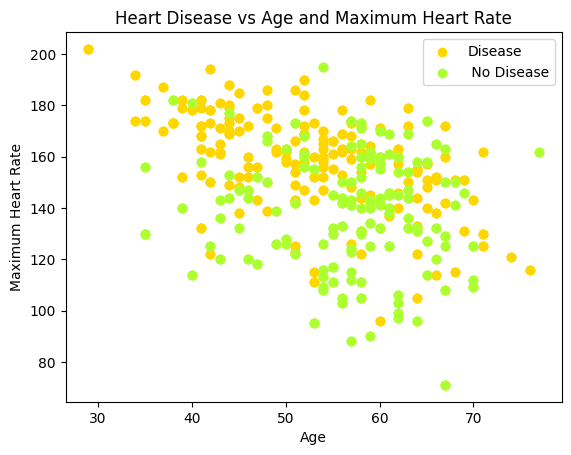

In [6]:
#scatter graph for heart disease vs Age and heart rate
plt.scatter(x = df.age[df.target == 1], y = df.thalach[df.target == 1], c = '#FFD700', label = "Disease")
plt.scatter(x = df.age[df.target == 0], y = df.thalach[df.target == 0], c = '#ADFF2F', label = " No Disease")

plt.legend()
#labelling the axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
#title
plt.title('Heart Disease vs Age and Maximum Heart Rate')

plt.show()

In [9]:
#creating a logistic regression 
#this helps to solve problems of classification
#we therefore need to create independent(y, training) and dependent(x, testing) variables

y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [10]:
#normalizing the data
x = (x_data - np.min(x_data)) / (np.max(x_data)) - np.min(x_data)

In [11]:
#splitting the data such that 80% is training data and 20% is testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)